<a href="https://colab.research.google.com/github/rumeysaer1234/alerji_tespiti_deneme/blob/main/deneme_bitirme.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="UIo5VUMdpYkwqsKMzSkf")
project = rf.workspace("ufcspa").project("food-101-allergen-30")
version = project.version(5)
dataset = version.download("yolov8")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 59.9 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Food-101-&-Allergen-30-5 in yolov8:: 100%|██████████| 19984/19984 [00:05<00:00, 3334.41it/s]


In [2]:
import os

# İndirilen veri setinin olduğu klasörü listele
dataset_path = "/content"  # Eğer farklı bir konuma indirdiysen yolu güncelle
os.listdir(dataset_path)


['.config', 'Food-101-&-Allergen-30-5', 'sample_data']

In [4]:
import os

# İndirilen veri setinin olduğu klasörü kontrol et
dataset_path = "/content/Food-101-Allergen-30-5"  # İndirilen klasör adı
if os.path.exists(dataset_path):
    print("Veri seti başarıyla indirildi. İçeriği:")
    print(os.listdir(dataset_path))
else:
    print("Veri seti bulunamadı, indirme işlemi başarısız olabilir.")


Veri seti bulunamadı, indirme işlemi başarısız olabilir.


In [6]:
import os

# İçeriği listeleyelim
print("İndirilen dosyalar:")
print(os.listdir("/content"))


İndirilen dosyalar:
['.config', 'Food-101-&-Allergen-30-5', 'sample_data']


In [7]:
import os

dataset_path = "/content/Food-101-&-Allergen-30-5"  # Klasör adını güncelledim
print("Klasör içeriği:")
print(os.listdir(dataset_path))


Klasör içeriği:
['data.yaml', 'valid', 'train', 'README.roboflow.txt', 'README.dataset.txt', 'test']


In [8]:
train_path = os.path.join(dataset_path, "train")
valid_path = os.path.join(dataset_path, "valid")
test_path = os.path.join(dataset_path, "test")

print("Train klasörü içeriği:", os.listdir(train_path) if os.path.exists(train_path) else "Bulunamadı.")
print("Valid klasörü içeriği:", os.listdir(valid_path) if os.path.exists(valid_path) else "Bulunamadı.")
print("Test klasörü içeriği:", os.listdir(test_path) if os.path.exists(test_path) else "Bulunamadı.")


Train klasörü içeriği: ['labels', 'images']
Valid klasörü içeriği: ['labels', 'images']
Test klasörü içeriği: ['labels', 'images']


In [9]:
with open("/content/Food-101-&-Allergen-30-5/data.yaml", "r") as f:
    print(f.read())


names:
- Leite-derivados do leite
- Outros
- Ovos
nc: 3
roboflow:
  license: CC BY 4.0
  project: food-101-allergen-30
  url: https://universe.roboflow.com/ufcspa/food-101-allergen-30/dataset/5
  version: 5
  workspace: ufcspa
test: ../test/images
train: ../train/images
val: ../valid/images



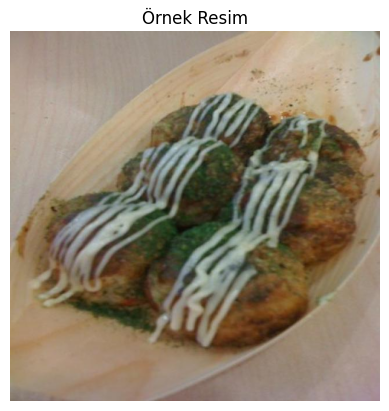

In [10]:
import os
import cv2
import matplotlib.pyplot as plt

# Bir örnek resim göster
image_folder = "/content/Food-101-&-Allergen-30-5/train/images"
image_files = os.listdir(image_folder)

if image_files:
    img_path = os.path.join(image_folder, image_files[0])
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis("off")
    plt.title("Örnek Resim")
    plt.show()
else:
    print("Train klasöründe resim bulunamadı.")


In [11]:
!pip install albumentations opencv-python numpy tqdm


In [13]:
import cv2
import os
import numpy as np
import albumentations as A
from tqdm import tqdm

# Görsellerin olduğu klasörleri tanımla
dataset_path = "/content/Food-101-&-Allergen-30-5"
output_path = "/content/Food-101-&-Allergen-30-5-processed"

train_img_path = os.path.join(dataset_path, "train/images")
valid_img_path = os.path.join(dataset_path, "valid/images")
test_img_path = os.path.join(dataset_path, "test/images")

output_train_img_path = os.path.join(output_path, "train/images")
output_valid_img_path = os.path.join(output_path, "valid/images")
output_test_img_path = os.path.join(output_path, "test/images")

# Çıktı dizinlerini oluştur
os.makedirs(output_train_img_path, exist_ok=True)
os.makedirs(output_valid_img_path, exist_ok=True)
os.makedirs(output_test_img_path, exist_ok=True)

# Veri artırma işlemleri
transform = A.Compose([
    A.Resize(640, 640),  # Boyut düzenleme
    A.RandomRotate90(),   # Rasgele 90 derece döndürme
    A.HorizontalFlip(p=0.5),  # %50 ihtimalle yatay çevirme
    A.VerticalFlip(p=0.5),  # %50 ihtimalle dikey çevirme
    A.RandomBrightnessContrast(p=0.2),  # Parlaklık & Kontrast değişikliği
    A.HueSaturationValue(p=0.2),  # Renk değişiklikleri
    A.Normalize(),  # Normalizasyon (0-1 aralığına çekme)
])

def preprocess_images(input_folder, output_folder):
    """Klasördeki tüm görselleri ön işler ve kaydeder."""
    images = os.listdir(input_folder)

    for img_name in tqdm(images, desc=f"Processing {input_folder}"):
        img_path = os.path.join(input_folder, img_name)
        img = cv2.imread(img_path)

        if img is None:
            continue

        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # RGB formatına çevir

        # Augmentation işlemlerini uygula
        augmented = transform(image=img)["image"]

        # Geri BGR formatına çevir ve kaydet
        augmented = (augmented * 255).astype(np.uint8)
        augmented = cv2.cvtColor(augmented, cv2.COLOR_RGB2BGR)

        output_img_path = os.path.join(output_folder, img_name)
        cv2.imwrite(output_img_path, augmented)

# Tüm veri seti için ön işleme yapalım
preprocess_images(train_img_path, output_train_img_path)
preprocess_images(valid_img_path, output_valid_img_path)
preprocess_images(test_img_path, output_test_img_path)

print("Veri ön işleme tamamlandı! 🚀")


Processing /content/Food-101-&-Allergen-30-5/train/images: 100%|██████████| 7018/7018 [03:10<00:00, 36.77it/s]
Processing /content/Food-101-&-Allergen-30-5/valid/images: 100%|██████████| 1955/1955 [00:49<00:00, 39.72it/s]
Processing /content/Food-101-&-Allergen-30-5/test/images: 100%|██████████| 1013/1013 [00:26<00:00, 38.32it/s]

Veri ön işleme tamamlandı! 🚀


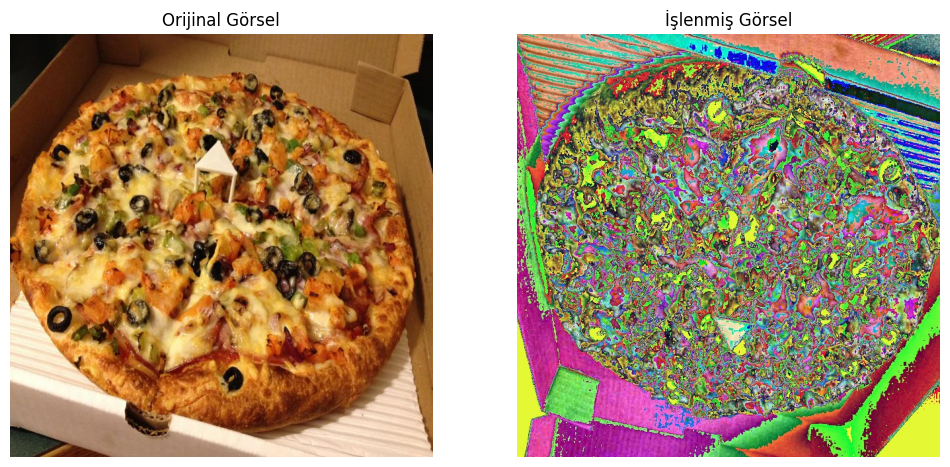

In [14]:
import matplotlib.pyplot as plt
import cv2
import random
import os

# Test için rastgele bir görsel seçelim
sample_img_name = random.choice(os.listdir(output_train_img_path))

# Orijinal ve işlenmiş görsellerin yollarını belirle
original_img_path = os.path.join(train_img_path, sample_img_name)
processed_img_path = os.path.join(output_train_img_path, sample_img_name)

# Görselleri yükle
original_img = cv2.imread(original_img_path)
original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)

processed_img = cv2.imread(processed_img_path)
processed_img = cv2.cvtColor(processed_img, cv2.COLOR_BGR2RGB)

# Görselleri göster
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(original_img)
ax[0].set_title("Orijinal Görsel")
ax[0].axis("off")

ax[1].imshow(processed_img)
ax[1].set_title("İşlenmiş Görsel")
ax[1].axis("off")

plt.show()


In [15]:
# Piksel farklarını hesaplayalım
difference = cv2.absdiff(original_img, processed_img)

# Eğer fark sıfırdan büyükse, değişiklik yapılmış demektir
if difference.sum() > 0:
    print("✅ Görseller arasında fark var. İşleme başarılı!")
else:
    print("⚠️ Görseller aynı görünüyor. İşlem uygulanmamış olabilir.")


✅ Görseller arasında fark var. İşleme başarılı!


In [16]:
def denoise_and_sharpen(image):
    # Gürültü azaltma (Gaussian Blur)
    blurred = cv2.GaussianBlur(image, (5, 5), 0)

    # Keskinleştirme filtresi
    kernel = np.array([[0, -1, 0],
                       [-1, 5,-1],
                       [0, -1, 0]])
    sharpened = cv2.filter2D(blurred, -1, kernel)

    return sharpened


In [17]:
def enhance_contrast(image):
    lab = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)  # LAB renk uzayına çevir
    l, a, b = cv2.split(lab)

    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    l = clahe.apply(l)  # Sadece L (aydınlık) kanalına uygula

    lab = cv2.merge((l, a, b))
    enhanced_image = cv2.cvtColor(lab, cv2.COLOR_LAB2RGB)

    return enhanced_image


In [18]:
A.Sharpen(p=0.2)  # Görüntüyü daha keskin hale getirir


Sharpen(p=0.2, alpha=(0.2, 0.5), lightness=(0.5, 1.0), method='kernel', kernel_size=5, sigma=1.0)

In [19]:
A.RandomGamma(p=0.2)


RandomGamma(p=0.2, gamma_limit=(80.0, 120.0))

In [24]:
pip install ultralytics opencv-python numpy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 932.6/932.6 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 87.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 68.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 59.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall